In [1]:
import os
import numpy as np

from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Declare variables
NEEDLE = "./images/needle2.png"
GAUGE = "./images/gauge2.png"

## Synthetic Images - Correct Needle placement
* Determine what angle the needle needs to be set to in order to display at the 0 gauge number.
* Deter what angle the needle needs to be set to in order to display the 15 gauge reading.
* Iterate over the range between the 0 angle and the 15 angle
* Create the image with the labels in PSI instead of degrees.

/var/folders/c_/60wzl10549z76183158nyxfc0000gn/T/ipykernel_15086/733083957.py:3: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image_rot_90 = image.rotate(214, expand=False, resample=Image.BICUBIC)


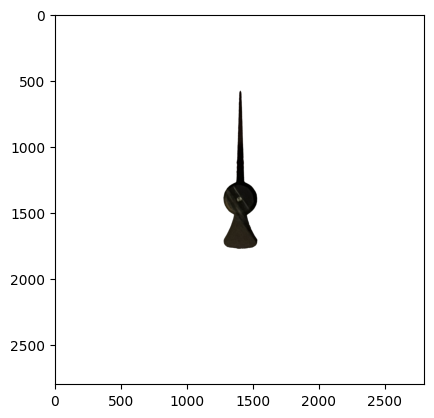

In [3]:
# Modify the image to set the needle at 0 degrees
image = Image.open(NEEDLE).convert("RGBA")
image_rot_90 = image.rotate(214, expand=False, resample=Image.BICUBIC)
image_rot_90.save("needle_rot_0.png")
plt.imshow(image_rot_90)

/var/folders/c_/60wzl10549z76183158nyxfc0000gn/T/ipykernel_15086/1077052433.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image_rot_134 = image.rotate(134, expand=False, resample=Image.BICUBIC)


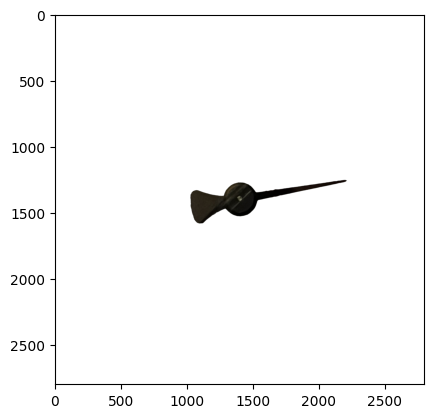

In [4]:
image_rot_134 = image.rotate(134, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_134)


/var/folders/c_/60wzl10549z76183158nyxfc0000gn/T/ipykernel_8268/1509003228.py:1: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image_rot_360 = image.rotate(360, expand=False, resample=Image.BICUBIC)


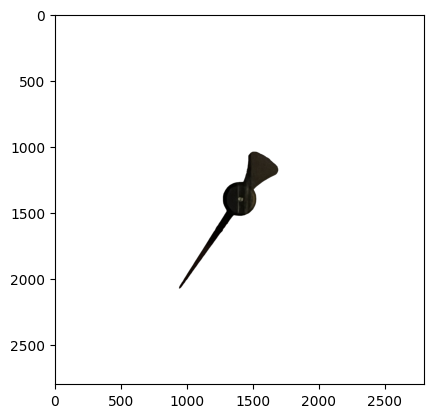

In [37]:
image_rot_360 = image.rotate(360, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_360)


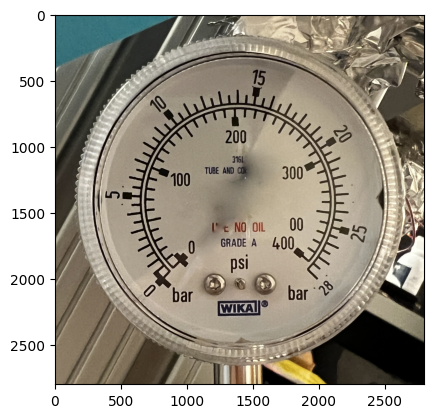

In [38]:
# Gauge background
image = Image.open(GAUGE).convert("RGBA")
plt.imshow(image)

### Needle image manipulation and rotation

In [6]:
# Rotate all the images of needles 360 degrees
PATH = "./images/needles/needle_rot_{0}.png"


def make_needles(angle):
    img = Image.open("needle_rot_0.png")
    x = img.rotate(-angle, expand=True, resample=Image.BICUBIC)
    # crop the rotated image to the size of the original image
    x = x.crop(
        box=(
            x.size[0] / 2 - img.size[0] / 2,
            x.size[1] / 2 - img.size[1] / 2,
            x.size[0] / 2 + img.size[0] / 2,
            x.size[1] / 2 + img.size[1] / 2,
        )
    )

    filename = PATH.format(angle)
    print(filename)
    x.save(filename)


for angle in range(14, 15):
    make_needles(angle)
make_needles(14)


/var/folders/c_/60wzl10549z76183158nyxfc0000gn/T/ipykernel_15086/3410917066.py:7: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  x = img.rotate(-angle, expand=True, resample=Image.BICUBIC)


./images/needles/needle_rot_14.png
./images/needles/needle_rot_14.png


### Individual folder structure for Tensorflow training

In [39]:
# Create the folders for each of the gauge classes
PATH = "./images/tf_gauges/psi_{0}"


def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Creating directory. " + directory)


maxValue = 28

m = range(0, 29)
n = range(1, 10)
o = range(5, 10)


for idx, outerReading in enumerate(m):
    # createFolder(PATH.format(outerReading))

    # the gauge stops at 15
    # if(outerReading != 15):
    #     # loop through 0.5 - 1
    #     for kdx, k in enumerate(o):
    #         pre_one = f"{outerReading}-{k}"
    #         createFolder(PATH.format(pre_one))

    # loop through 1 - 15
    if outerReading >= 0 and outerReading <= maxValue:
        whole = f"{outerReading}-0"
        createFolder(PATH.format(whole))

        # Loop through #.1 = #.9
        if outerReading != 28:
            for jdx, j in enumerate(n):
                decimal = f"{outerReading}-{j}"
                createFolder(PATH.format(decimal))

### Generate synthetic gauges and save for Tensorflow training

In [7]:
NEEDLES_PATH = "./images/needles/needle_rot_{0}.png"
TF_GAUGES = "./images/tf_gauges/psi_{0}"
EDA_GAUGES = "./images/gauges/{0}"


def save_gauge(item, num):
    print(item, num)
    img_gauge = Image.open(GAUGE, "r")

    filename = NEEDLES_PATH.format(item)
    img_needle = Image.open(filename, "r")
    img_copy = img_gauge.copy()

    img_copy.paste(img_needle.convert("L"), (-28, -38), img_needle.convert("RGBA"))

    # Save the synthetic image to the class folder
    string_num = str(num)
    dash = string_num.replace(".", "-")
    folder = TF_GAUGES.format(dash)
    # if(os.path.isfile(EDA_GAUGES.format(f"gauge_{dash}.png"))):
    # return

    # Save PNG for data Augmentation
    gauge_name = "{0}/gauge_0.png"
    filename_save = gauge_name.format(folder)
    if os.path.isfile(filename_save):
        return
    img_copy.save(filename_save)

    # Save PNG for EDA
    eda_name = "gauge_{0}.png".format(dash)
    img_copy.save(EDA_GAUGES.format(eda_name))
    return


def iterate_gauge(mapping):
    for idx, item in enumerate(mapping):
        save_gauge(mapping[item], item)


import concurrent.futures


def iterate_gauge2(mapping):
    with concurrent.futures.ThreadPoolExecutor(max_workers=64) as executor:
        for item, value in mapping.items():
            executor.submit(save_gauge, value, item)

In [8]:
# Define a mapping between degrees in circle and gauge readings
# gaugeDegreeMap = {
#     0:231, 0.5:233, 0.6:235, 0.7:237, 0.8:239, 0.9:241,
#     1:243, 1.1:244, 1.2:246, 1.3:248, 1.4:249, 1.5:250, 1.6:253, 1.7:255, 1.8:257, 1.9:259,
#     2:260, 2.1:262, 2.2:264, 2.3:266, 2.4:268, 2.5:270, 2.6:271, 2.7:273, 2.8:275, 2.9:277,
#     3:279, 3.1:280, 3.2:282, 3.3:284, 3.4:286, 3.5:287, 3.6:290, 3.7:291, 3.8:293, 3.9:295,
#     4:297, 4.1:299, 4.2:301, 4.3:302, 4.4:304, 4.5:306, 4.6:308, 4.7:310, 4.8:311, 4.9:313,
#     5:315, 5.1:317, 5.2:319, 5.3:321, 5.4:323, 5.5:325, 5.6:327, 5.7:328, 5.8:330, 5.9:332,
#     6:334, 6.1:336, 6.2:338, 6.3:339, 6.4:341, 6.5:343, 6.6:345, 6.7:347, 6.8:349, 6.9:350,
#     7:352, 7.1:355, 7.2:357, 7.3:358, 7.4:360, 7.5:2, 7.6:4, 7.7:6, 7.8:7, 7.9:9,
#     8:11, 8.1:13, 8.2:15, 8.3:16, 8.4:18, 8.5:21, 8.6:23, 8.7:24, 8.8:26, 8.9:28,
#     9:30, 9.1:32, 9.2:33, 9.3:35, 9.4:37, 9.5:39, 9.6:41, 9.7:42, 9.8:44, 9.9:46,
#     10:48, 10.1:50, 10.2:52, 10.3:53, 10.4:55, 10.5:57, 10.6:58, 10.7:60, 10.8:62, 10.9:64,
#     11:66, 11.1:68, 11.2:69, 11.3:71, 11.4:73, 11.5:75, 11.6:76, 11.7:78, 11.8:80, 11.9:82,
#     12:84, 12.1:85, 12.2:87, 12.3:89, 12.4:91, 12.5:92, 12.6:94, 12.7:96, 12.8:98, 12.9:99,
#     13:101, 13.1:103, 13.2:105, 13.3:107, 13.4:108, 13.5:110, 13.6:112, 13.7:114, 13.8:115, 13.9:117,
#     14:119, 14.1:121, 14.2:122, 14.3:124, 14.4:126, 14.5:127, 14.6:129, 14.7:131, 14.8:133, 14.9:135,
#     15: 136
# }

gaugeDegreeMap = dict()
gaugeDegreeMap2 = dict()


zeroAngle = 221
maxAngle = 137

minVal = 0
maxVal = 28

for deg in np.arange(0, 277, 1):
    gaugeAngle = deg - maxAngle - 2
    if gaugeAngle < 0:
        gaugeAngle += 360
    pressure = round(deg / 276 * maxVal, 1)
    gaugeDegreeMap2[pressure] = gaugeAngle

print(gaugeDegreeMap2)

for pressure in np.arange(0, 28.1, 0.1):
    pressure = round(pressure, 2)
    deg = pressure / maxVal * (360 - (zeroAngle - maxAngle))
    gaugeAngle = deg - maxAngle - 2

    if gaugeAngle < 0:
        gaugeAngle += 360
    gaugeDegreeMap[pressure] = int(round(gaugeAngle, 0))

gaugeDegreeMap

{0.0: 221, 0.1: 222, 0.2: 223, 0.3: 224, 0.4: 225, 0.5: 226, 0.6: 227, 0.7: 228, 0.8: 229, 0.9: 230, 1.0: 231, 1.1: 232, 1.2: 233, 1.3: 234, 1.4: 235, 1.5: 236, 1.6: 237, 1.7: 238, 1.8: 239, 1.9: 240, 2.0: 241, 2.1: 242, 2.2: 243, 2.3: 244, 2.4: 245, 2.5: 246, 2.6: 247, 2.7: 248, 2.8: 249, 2.9: 250, 3.0: 251, 3.1: 252, 3.2: 253, 3.3: 254, 3.4: 255, 3.6: 256, 3.7: 257, 3.8: 258, 3.9: 259, 4.0: 260, 4.1: 261, 4.2: 262, 4.3: 263, 4.4: 264, 4.5: 265, 4.6: 266, 4.7: 267, 4.8: 268, 4.9: 269, 5.0: 270, 5.1: 271, 5.2: 272, 5.3: 273, 5.4: 274, 5.5: 275, 5.6: 276, 5.7: 277, 5.8: 278, 5.9: 279, 6.0: 280, 6.1: 281, 6.2: 282, 6.3: 283, 6.4: 284, 6.5: 285, 6.6: 286, 6.7: 287, 6.8: 288, 6.9: 289, 7.0: 290, 7.1: 291, 7.2: 292, 7.3: 293, 7.4: 294, 7.5: 295, 7.6: 296, 7.7: 297, 7.8: 298, 7.9: 299, 8.0: 300, 8.1: 301, 8.2: 302, 8.3: 303, 8.4: 304, 8.5: 305, 8.6: 306, 8.7: 307, 8.8: 308, 8.9: 309, 9.0: 310, 9.1: 311, 9.2: 312, 9.3: 313, 9.4: 314, 9.5: 315, 9.6: 316, 9.7: 317, 9.8: 318, 9.9: 319, 10.0: 320

{0.0: 221,
 0.1: 222,
 0.2: 223,
 0.3: 224,
 0.4: 225,
 0.5: 226,
 0.6: 227,
 0.7: 228,
 0.8: 229,
 0.9: 230,
 1.0: 231,
 1.1: 232,
 1.2: 233,
 1.3: 234,
 1.4: 235,
 1.5: 236,
 1.6: 237,
 1.7: 238,
 1.8: 239,
 1.9: 240,
 2.0: 241,
 2.1: 242,
 2.2: 243,
 2.3: 244,
 2.4: 245,
 2.5: 246,
 2.6: 247,
 2.7: 248,
 2.8: 249,
 2.9: 250,
 3.0: 251,
 3.1: 252,
 3.2: 253,
 3.3: 254,
 3.4: 255,
 3.5: 256,
 3.6: 256,
 3.7: 257,
 3.8: 258,
 3.9: 259,
 4.0: 260,
 4.1: 261,
 4.2: 262,
 4.3: 263,
 4.4: 264,
 4.5: 265,
 4.6: 266,
 4.7: 267,
 4.8: 268,
 4.9: 269,
 5.0: 270,
 5.1: 271,
 5.2: 272,
 5.3: 273,
 5.4: 274,
 5.5: 275,
 5.6: 276,
 5.7: 277,
 5.8: 278,
 5.9: 279,
 6.0: 280,
 6.1: 281,
 6.2: 282,
 6.3: 283,
 6.4: 284,
 6.5: 285,
 6.6: 286,
 6.7: 287,
 6.8: 288,
 6.9: 289,
 7.0: 290,
 7.1: 291,
 7.2: 292,
 7.3: 293,
 7.4: 294,
 7.5: 295,
 7.6: 296,
 7.7: 297,
 7.8: 298,
 7.9: 299,
 8.0: 300,
 8.1: 301,
 8.2: 302,
 8.3: 303,
 8.4: 304,
 8.5: 305,
 8.6: 306,
 8.7: 307,
 8.8: 308,
 8.9: 309,
 9.0: 310,

In [9]:
360 - (zeroAngle - maxAngle)


276

In [10]:
# Iterate through the lookup map
iterate_gauge(gaugeDegreeMap)


221 0.0
222 0.1
223 0.2
224 0.3
225 0.4
226 0.5
227 0.6
228 0.7
229 0.8
230 0.9
231 1.0
232 1.1
233 1.2
234 1.3
235 1.4
236 1.5
237 1.6
238 1.7
239 1.8
240 1.9
241 2.0
242 2.1
243 2.2
244 2.3
245 2.4
246 2.5
247 2.6
248 2.7
249 2.8
250 2.9
251 3.0
252 3.1
253 3.2
254 3.3
255 3.4
256 3.5
256 3.6
257 3.7
258 3.8
259 3.9
260 4.0
261 4.1
262 4.2
263 4.3
264 4.4
265 4.5
266 4.6
267 4.7
268 4.8
269 4.9
270 5.0
271 5.1
272 5.2
273 5.3
274 5.4
275 5.5
276 5.6
277 5.7
278 5.8
279 5.9
280 6.0
281 6.1
282 6.2
283 6.3
284 6.4
285 6.5
286 6.6
287 6.7
288 6.8
289 6.9
290 7.0
291 7.1
292 7.2
293 7.3
294 7.4
295 7.5
296 7.6
297 7.7
298 7.8
299 7.9
300 8.0
301 8.1
302 8.2
303 8.3
304 8.4
305 8.5
306 8.6
307 8.7
308 8.8
309 8.9
310 9.0
311 9.1
312 9.2
313 9.3
314 9.4
315 9.5
316 9.6
317 9.7
318 9.8
319 9.9
320 10.0
321 10.1
322 10.2
323 10.3
324 10.4
324 10.5
325 10.6
326 10.7
327 10.8
328 10.9
329 11.0
330 11.1
331 11.2
332 11.3
333 11.4
334 11.5
335 11.6
336 11.7
337 11.8
338 11.9
339 12.0
340 12.1
34

In [ ]:
list(range(0, 1))


[0]